In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('data/Global_Superstore__1_.xlsx')

# Show basic info
print("✅ DATA LOADED SUCCESSFULLY!")
print("=" * 50)
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print("=" * 50)
print("\nFirst 3 rows:")
df.head(3)

✅ DATA LOADED SUCCESSFULLY!
Total Rows: 51,290
Total Columns: 23

First 3 rows:


,Category,City,Country,Customer Name,Market,Customer ID,Order Date,Order ID,Order Priority,Product ID,...,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Constantine,Algeria,Toby Braunhardt,EMEA,TB-112801,2011-01-01,AG-2011-2040,Medium,OFF-TEN-10000025,...,Consumer,2011-01-06,Standard Class,Constantine,Storage,0.0,106.14,2,408.30,35.46
1,Office Supplies,Dar es Salaam,Tanzania,Jack Garza,EMEA,JG-51151,2011-01-03,TZ-2011-7370,Medium,OFF-STI-10000388,...,Consumer,2011-01-08,Standard Class,Dar Es Salaam,Supplies,0.0,26.76,4,81.24,5.11
2,Office Supplies,Khartoum,Sudan,Jasper Cacioppo,EMEA,JC-53401,2011-01-04,SU-2011-5190,Medium,OFF-BOS-10004950,...,Consumer,2011-01-08,Standard Class,Khartoum,Art,0.0,2.61,1,15.48,0.82


In [5]:
# See all column names and their data types
print("📋 ALL COLUMNS IN YOUR DATASET:")
print("=" * 50)

for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print("\n" + "=" * 50)
print("📊 DATA TYPES:")
print("=" * 50)
print(df.dtypes)

📋 ALL COLUMNS IN YOUR DATASET:
 1. Category
 2. City
 3. Country
 4. Customer Name
 5. Market
 6. Customer ID
 7. Order Date
 8. Order ID
 9. Order Priority
10. Product ID
11. Product Name
12. Region
13. Row ID
14. Segment
15. Ship Date
16. Ship Mode
17. State
18. Sub-Category
19. Discount
20. Profit
21. Quantity
22. Sales
23. Shipping Cost

📊 DATA TYPES:
Category                  object
City                      object
Country                   object
Customer Name             object
Market                    object
Customer ID               object
Order Date        datetime64[ns]
Order ID                  object
Order Priority            object
Product ID                object
Product Name              object
Region                    object
Row ID                     int64
Segment                   object
Ship Date         datetime64[ns]
Ship Mode                 object
State                     object
Sub-Category              object
Discount                 float64
Profit         

In [6]:
print("⭐ STAR SCHEMA STRUCTURE FOR YOUR DATA")
print("=" * 60)

print("""
                      ┌─────────────────┐
                      │   DIM_DATE      │
                      │─────────────────│
                      │ Order Date      │
                      │ Ship Date       │
                      └────────┬────────┘
                               │
┌─────────────────┐    ┌───────┴────────┐    ┌─────────────────┐
│  DIM_CUSTOMER   │    │   FACT_SALES   │    │  DIM_PRODUCT    │
│─────────────────│    │────────────────│    │─────────────────│
│ Customer ID     │◄───│ Customer ID    │───►│ Product ID      │
│ Customer Name   │    │ Product ID     │    │ Product Name    │
│ Segment         │    │ Order ID       │    │ Category        │
└─────────────────┘    │                │    │ Sub-Category    │
                       │ Sales ⬅ MEASURE│    └─────────────────┘
┌─────────────────┐    │ Profit         │    
│  DIM_LOCATION   │    │ Quantity       │    ┌─────────────────┐
│─────────────────│    │ Discount       │    │  DIM_SHIPPING   │
│ City            │◄───│ Shipping Cost  │───►│─────────────────│
│ State           │    │                │    │ Ship Mode       │
│ Country         │    └────────────────┘    │ Order Priority  │
│ Region          │                          └─────────────────┘
│ Market          │
└─────────────────┘
""")

print("=" * 60)
print("📊 FACT TABLE (Measures - Numbers to analyze):")
print("   • Sales, Profit, Quantity, Discount, Shipping Cost")
print("")
print("📁 DIMENSION TABLES (Descriptive - How to slice data):")
print("   • Customer, Product, Location, Date, Shipping")

⭐ STAR SCHEMA STRUCTURE FOR YOUR DATA

                      ┌─────────────────┐
                      │   DIM_DATE      │
                      │─────────────────│
                      │ Order Date      │
                      │ Ship Date       │
                      └────────┬────────┘
                               │
┌─────────────────┐    ┌───────┴────────┐    ┌─────────────────┐
│  DIM_CUSTOMER   │    │   FACT_SALES   │    │  DIM_PRODUCT    │
│─────────────────│    │────────────────│    │─────────────────│
│ Customer ID     │◄───│ Customer ID    │───►│ Product ID      │
│ Customer Name   │    │ Product ID     │    │ Product Name    │
│ Segment         │    │ Order ID       │    │ Category        │
└─────────────────┘    │                │    │ Sub-Category    │
                       │ Sales ⬅ MEASURE│    └─────────────────┘
┌─────────────────┐    │ Profit         │    
│  DIM_LOCATION   │    │ Quantity       │    ┌─────────────────┐
│─────────────────│    │ Discount       │    

In [7]:
print("=" * 60)
print("🔍 DATA QUALITY DIMENSION 1: COMPLETENESS")
print("=" * 60)
print("\nCompleteness = Is all required data present?\n")

# Check for missing values in each column
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

# Create a report
completeness_report = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct,
    'Complete %': (100 - missing_pct).round(2)
})

# Show only columns with missing values
has_missing = completeness_report[completeness_report['Missing Count'] > 0]

if len(has_missing) > 0:
    print("⚠️ COLUMNS WITH MISSING VALUES:")
    print(has_missing)
else:
    print("✅ No missing values found!")

print("\n" + "=" * 60)
print("📊 TOTAL MISSING VALUES SUMMARY:")
print(f"   Total cells in dataset: {df.size:,}")
print(f"   Total missing cells: {df.isnull().sum().sum():,}")
print(f"   Overall completeness: {((1 - df.isnull().sum().sum()/df.size) * 100):.2f}%")

🔍 DATA QUALITY DIMENSION 1: COMPLETENESS

Completeness = Is all required data present?

✅ No missing values found!

📊 TOTAL MISSING VALUES SUMMARY:
   Total cells in dataset: 1,179,670
   Total missing cells: 0
   Overall completeness: 100.00%


In [8]:
print("=" * 60)
print("🔍 CHECKING FOR HIDDEN MISSING VALUES")
print("=" * 60)

# Check for empty strings in text columns
text_columns = df.select_dtypes(include=['object']).columns

print("\n📋 Checking text columns for empty strings or placeholders...\n")

for col in text_columns:
    empty_strings = (df[col] == '').sum()
    spaces_only = (df[col].str.strip() == '').sum() if df[col].dtype == 'object' else 0
    
    if empty_strings > 0 or spaces_only > 0:
        print(f"⚠️ {col}: {empty_strings} empty, {spaces_only} spaces-only")

print("\n" + "=" * 60)
print("📊 CHECKING FOR PLACEHOLDER VALUES:")
print("=" * 60)

# Check for common placeholder values
placeholders = ['N/A', 'NA', 'n/a', 'Unknown', 'unknown', 'None', '-', '?']

for col in text_columns:
    for placeholder in placeholders:
        count = (df[col] == placeholder).sum()
        if count > 0:
            print(f"⚠️ {col}: Found '{placeholder}' {count} times")

print("\n✅ Hidden missing values check complete!")

🔍 CHECKING FOR HIDDEN MISSING VALUES

📋 Checking text columns for empty strings or placeholders...


📊 CHECKING FOR PLACEHOLDER VALUES:

✅ Hidden missing values check complete!


In [9]:
print("=" * 60)
print("🔍 DATA QUALITY DIMENSION 2: CONSISTENCY")
print("=" * 60)
print("\nConsistency = Does data contradict itself?\n")

# Check for negative values in numeric columns
print("📊 CHECKING NUMERIC VALUES:")
print("-" * 40)

# Sales should be positive
negative_sales = df[df['Sales'] < 0]
print(f"Negative Sales: {len(negative_sales):,} records")

# Quantity should be positive
negative_qty = df[df['Quantity'] < 0]
print(f"Negative Quantity: {len(negative_qty):,} records")

# Profit can be negative (loss), but let's see the range
print(f"\nProfit Range: ${df['Profit'].min():,.2f} to ${df['Profit'].max():,.2f}")
negative_profit = df[df['Profit'] < 0]
print(f"Negative Profit (Losses): {len(negative_profit):,} records ({len(negative_profit)/len(df)*100:.1f}%)")

# Discount should be between 0 and 1 (or 0-100%)
print(f"\nDiscount Range: {df['Discount'].min()} to {df['Discount'].max()}")
high_discount = df[df['Discount'] > 0.5]
print(f"Discounts > 50%: {len(high_discount):,} records")

# Shipping cost should be positive
negative_shipping = df[df['Shipping Cost'] < 0]
print(f"\nNegative Shipping Cost: {len(negative_shipping):,} records")

🔍 DATA QUALITY DIMENSION 2: CONSISTENCY

Consistency = Does data contradict itself?

📊 CHECKING NUMERIC VALUES:
----------------------------------------
Negative Sales: 0 records
Negative Quantity: 0 records

Profit Range: $-6,599.98 to $8,399.98
Negative Profit (Losses): 12,544 records (24.5%)

Discount Range: 0.0 to 0.85
Discounts > 50%: 4,172 records

Negative Shipping Cost: 0 records


In [10]:
print("=" * 60)
print("🔍 CONSISTENCY CHECK: Date Logic")
print("=" * 60)

# Ship Date should be AFTER Order Date
df['Date_Diff'] = (df['Ship Date'] - df['Order Date']).dt.days

# Check for impossible dates (shipped BEFORE ordered)
shipped_before_ordered = df[df['Date_Diff'] < 0]
print(f"\n⚠️ Orders shipped BEFORE order date: {len(shipped_before_ordered):,} records")

if len(shipped_before_ordered) > 0:
    print("\nExamples of problematic records:")
    print(shipped_before_ordered[['Order ID', 'Order Date', 'Ship Date', 'Date_Diff']].head(5))

# Check for same-day shipping
same_day = df[df['Date_Diff'] == 0]
print(f"\n📦 Same-day shipping: {len(same_day):,} records")

# Check for very long shipping times (over 30 days)
long_shipping = df[df['Date_Diff'] > 30]
print(f"⚠️ Shipping took > 30 days: {len(long_shipping):,} records")

print("\n" + "=" * 60)
print("📊 SHIPPING TIME SUMMARY:")
print(f"   Minimum: {df['Date_Diff'].min()} days")
print(f"   Maximum: {df['Date_Diff'].max()} days")
print(f"   Average: {df['Date_Diff'].mean():.1f} days")

🔍 CONSISTENCY CHECK: Date Logic

⚠️ Orders shipped BEFORE order date: 0 records

📦 Same-day shipping: 2,600 records
⚠️ Shipping took > 30 days: 0 records

📊 SHIPPING TIME SUMMARY:
   Minimum: 0 days
   Maximum: 7 days
   Average: 4.0 days


In [11]:
print("=" * 60)
print("🔍 CONSISTENCY CHECK: Dimension Data Integrity")
print("=" * 60)
print("\nIn a Star Schema, each ID should have ONE description.\n")

# Check 1: Same Customer ID with different names?
customer_names_per_id = df.groupby('Customer ID')['Customer Name'].nunique()
inconsistent_customers = customer_names_per_id[customer_names_per_id > 1]
print(f"📋 CUSTOMER DIMENSION:")
print(f"   Total unique Customer IDs: {df['Customer ID'].nunique():,}")
print(f"   ⚠️ Customer IDs with multiple names: {len(inconsistent_customers)}")

# Check 2: Same Product ID with different names?
product_names_per_id = df.groupby('Product ID')['Product Name'].nunique()
inconsistent_products = product_names_per_id[product_names_per_id > 1]
print(f"\n📦 PRODUCT DIMENSION:")
print(f"   Total unique Product IDs: {df['Product ID'].nunique():,}")
print(f"   ⚠️ Product IDs with multiple names: {len(inconsistent_products)}")

# Check 3: Same City in different Countries?
city_countries = df.groupby('City')['Country'].nunique()
cities_multiple_countries = city_countries[city_countries > 1]
print(f"\n🌍 LOCATION DIMENSION:")
print(f"   Total unique Cities: {df['City'].nunique():,}")
print(f"   ⚠️ Cities appearing in multiple countries: {len(cities_multiple_countries)}")

if len(cities_multiple_countries) > 0:
    print(f"\n   Examples of cities in multiple countries:")
    for city in cities_multiple_countries.head(5).index:
        countries = df[df['City'] == city]['Country'].unique()
        print(f"   • '{city}' appears in: {', '.join(countries)}")

🔍 CONSISTENCY CHECK: Dimension Data Integrity

In a Star Schema, each ID should have ONE description.

📋 CUSTOMER DIMENSION:
   Total unique Customer IDs: 4,873
   ⚠️ Customer IDs with multiple names: 0

📦 PRODUCT DIMENSION:
   Total unique Product IDs: 10,292
   ⚠️ Product IDs with multiple names: 457

🌍 LOCATION DIMENSION:
   Total unique Cities: 3,636
   ⚠️ Cities appearing in multiple countries: 63

   Examples of cities in multiple countries:
   • 'Aberdeen' appears in: United Kingdom, United States
   • 'Alexandria' appears in: Egypt, United States
   • 'Anyang' appears in: China, South Korea
   • 'Barcelona' appears in: Spain, Venezuela
   • 'Bayeux' appears in: France, Brazil


In [12]:
print("=" * 60)
print("🔍 INVESTIGATING: Product ID Inconsistency")
print("=" * 60)
print("\n⚠️ These Product IDs have DIFFERENT names in different records:")
print("   This violates Star Schema dimension integrity!\n")

# Find Product IDs with multiple names
product_names_per_id = df.groupby('Product ID')['Product Name'].nunique()
inconsistent_products = product_names_per_id[product_names_per_id > 1]

# Show examples
print(f"Showing 5 examples of {len(inconsistent_products)} inconsistent products:\n")
print("-" * 60)

count = 0
for product_id in inconsistent_products.index:
    if count >= 5:
        break
    names = df[df['Product ID'] == product_id]['Product Name'].unique()
    print(f"\n📦 Product ID: {product_id}")
    print(f"   Has {len(names)} different names:")
    for name in names[:3]:  # Show max 3 names
        print(f"   • {name}")
    count += 1

print("\n" + "=" * 60)
print("💡 WHY THIS MATTERS FOR DATA WAREHOUSING:")
print("   In a DIM_PRODUCT table, each Product ID should have")
print("   exactly ONE Product Name. Multiple names cause:")
print("   • Duplicate dimension records")
print("   • Inconsistent reports")
print("   • JOIN errors in queries")

🔍 INVESTIGATING: Product ID Inconsistency

⚠️ These Product IDs have DIFFERENT names in different records:
   This violates Star Schema dimension integrity!

Showing 5 examples of 457 inconsistent products:

------------------------------------------------------------

📦 Product ID: FUR-BO-10000087
   Has 2 different names:
   • Dania Classic Bookcase, Mobile
   • Sauder Corner Shelving, Pine

📦 Product ID: FUR-BO-10000112
   Has 2 different names:
   • Dania Corner Shelving, Pine
   • Bush Birmingham Collection Bookcase, Dark Cherry

📦 Product ID: FUR-BO-10000268
   Has 2 different names:
   • Ikea 3-Shelf Cabinet, Traditional
   • Bush Library with Doors, Pine

📦 Product ID: FUR-BO-10000668
   Has 2 different names:
   • Ikea Corner Shelving, Traditional
   • Sauder Classic Bookcase, Mobile

📦 Product ID: FUR-BO-10000728
   Has 2 different names:
   • Dania Corner Shelving, Traditional
   • Ikea Classic Bookcase, Mobile

💡 WHY THIS MATTERS FOR DATA WAREHOUSING:
   In a DIM_PRODUCT ta

In [13]:
print("=" * 60)
print("🔍 DATA QUALITY DIMENSION 3: VALIDITY")
print("=" * 60)
print("\nValidity = Does data follow business rules and formats?\n")

# Check 1: Valid Categories
print("📁 CATEGORY VALUES:")
print(f"   Unique categories: {df['Category'].nunique()}")
print(f"   Values: {list(df['Category'].unique())}")

# Check 2: Valid Segments
print(f"\n👥 SEGMENT VALUES:")
print(f"   Unique segments: {df['Segment'].nunique()}")
print(f"   Values: {list(df['Segment'].unique())}")

# Check 3: Valid Ship Modes
print(f"\n🚚 SHIP MODE VALUES:")
print(f"   Unique ship modes: {df['Ship Mode'].nunique()}")
print(f"   Values: {list(df['Ship Mode'].unique())}")

# Check 4: Order Priority
print(f"\n⚡ ORDER PRIORITY VALUES:")
print(f"   Unique priorities: {df['Order Priority'].nunique()}")
print(f"   Values: {list(df['Order Priority'].unique())}")

# Check 5: Discount range (should be 0 to 1)
print(f"\n💰 DISCOUNT VALIDITY:")
print(f"   Range: {df['Discount'].min()} to {df['Discount'].max()}")
invalid_discount = df[(df['Discount'] < 0) | (df['Discount'] > 1)]
print(f"   ⚠️ Invalid discounts (outside 0-1): {len(invalid_discount)} records")

🔍 DATA QUALITY DIMENSION 3: VALIDITY

Validity = Does data follow business rules and formats?

📁 CATEGORY VALUES:
   Unique categories: 3
   Values: ['Office Supplies', 'Technology', 'Furniture']

👥 SEGMENT VALUES:
   Unique segments: 3
   Values: ['Consumer', 'Corporate', 'Home Office']

🚚 SHIP MODE VALUES:
   Unique ship modes: 4
   Values: ['Standard Class', 'First Class', 'Second Class', 'Same Day']

⚡ ORDER PRIORITY VALUES:
   Unique priorities: 4
   Values: ['Medium', 'High', 'Low', 'Critical']

💰 DISCOUNT VALIDITY:
   Range: 0.0 to 0.85
   ⚠️ Invalid discounts (outside 0-1): 0 records


In [14]:
print("=" * 60)
print("🔍 REFERENTIAL INTEGRITY CHECK")
print("=" * 60)
print("\nIn a Star Schema, Fact Table foreign keys must match Dimension keys.\n")

# Simulate creating dimension tables and check for orphans

# DIM_CUSTOMER
unique_customers = df[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates()
print(f"📋 DIM_CUSTOMER would have: {len(unique_customers):,} records")

# Check if same Customer ID has different Segments
cust_segments = df.groupby('Customer ID')['Segment'].nunique()
cust_multi_segment = cust_segments[cust_segments > 1]
print(f"   ⚠️ Customers in multiple segments: {len(cust_multi_segment)}")

# DIM_PRODUCT
unique_products = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].drop_duplicates()
print(f"\n📦 DIM_PRODUCT would have: {len(unique_products):,} records")
print(f"   (But only {df['Product ID'].nunique():,} unique Product IDs)")
print(f"   ⚠️ Extra records due to inconsistent names: {len(unique_products) - df['Product ID'].nunique()}")

# DIM_LOCATION
unique_locations = df[['City', 'State', 'Country', 'Region', 'Market']].drop_duplicates()
print(f"\n🌍 DIM_LOCATION would have: {len(unique_locations):,} records")

# Check: Same City-State in different Countries?
city_state_countries = df.groupby(['City', 'State'])['Country'].nunique()
inconsistent_locations = city_state_countries[city_state_countries > 1]
print(f"   ⚠️ City-State combinations in multiple countries: {len(inconsistent_locations)}")

print("\n" + "=" * 60)
print("💡 REFERENTIAL INTEGRITY IMPACT:")
print("   The 457 products with multiple names would create")
print(f"   {len(unique_products) - df['Product ID'].nunique()} duplicate dimension records,")
print("   breaking the star schema design principle.")

🔍 REFERENTIAL INTEGRITY CHECK

In a Star Schema, Fact Table foreign keys must match Dimension keys.

📋 DIM_CUSTOMER would have: 4,873 records
   ⚠️ Customers in multiple segments: 0

📦 DIM_PRODUCT would have: 10,768 records
   (But only 10,292 unique Product IDs)
   ⚠️ Extra records due to inconsistent names: 476

🌍 DIM_LOCATION would have: 3,819 records
   ⚠️ City-State combinations in multiple countries: 0

💡 REFERENTIAL INTEGRITY IMPACT:
   The 457 products with multiple names would create
   476 duplicate dimension records,
   breaking the star schema design principle.


✅ Chart saved to: results/data_quality_issues.png


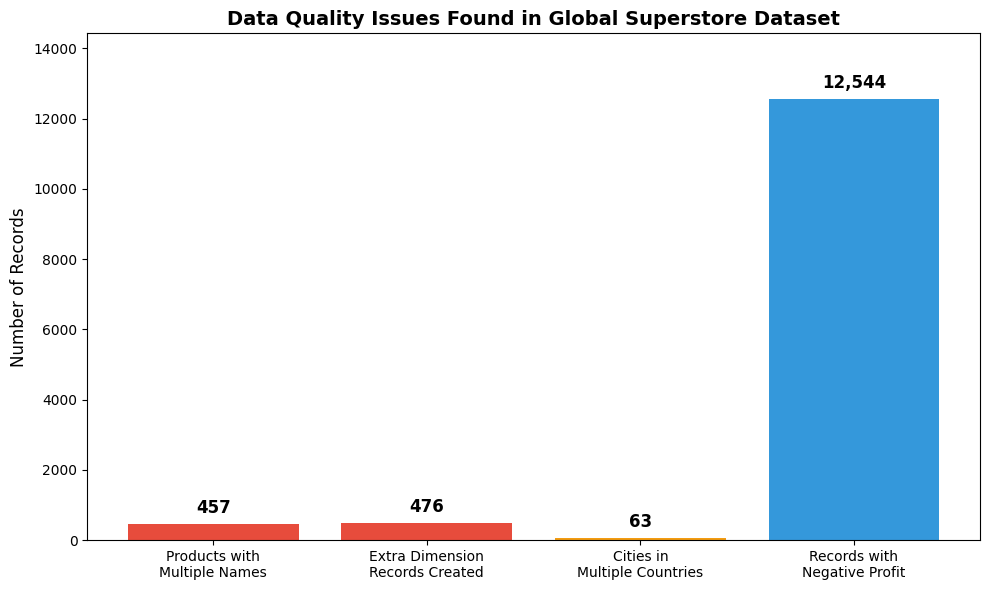

In [15]:
import matplotlib.pyplot as plt

# Create a summary chart of data quality issues
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the chart
issues = ['Products with\nMultiple Names', 'Extra Dimension\nRecords Created', 'Cities in\nMultiple Countries', 'Records with\nNegative Profit']
counts = [457, 476, 63, 12544]
colors = ['#e74c3c', '#e74c3c', '#f39c12', '#3498db']

bars = ax.bar(issues, counts, color=colors)

# Add value labels on bars
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, 
            f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Records', fontsize=12)
ax.set_title('Data Quality Issues Found in Global Superstore Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(counts) * 1.15)

# Add a legend
ax.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()

# Save the chart
plt.savefig('results/data_quality_issues.png', dpi=150, bbox_inches='tight')
print("✅ Chart saved to: results/data_quality_issues.png")

plt.show()

In [16]:
# Create a summary of all findings
summary = """
================================================================
DATA QUALITY ANALYSIS SUMMARY - GLOBAL SUPERSTORE DATASET
================================================================

DATASET OVERVIEW:
- Total Records: 51,290
- Total Columns: 23
- Data Source: Global Superstore Sales Data

================================================================
DIMENSION 1: COMPLETENESS
================================================================
✅ Overall Completeness: 100%
✅ No NULL values found
✅ No empty strings or placeholder values

================================================================
DIMENSION 2: CONSISTENCY
================================================================
⚠️ ISSUE FOUND: Product ID Inconsistency

- 457 Product IDs have multiple different Product Names
- This creates 476 extra records when building DIM_PRODUCT
- Example: Product ID 'FUR-BO-10000087' has 2 names:
  • Dania Classic Bookcase, Mobile
  • Sauder Corner Shelving, Pine

IMPACT ON DATA WAREHOUSING:
- Violates dimension table integrity
- Creates duplicate dimension records
- Causes inconsistent reporting
- Breaks star schema design principles

OTHER FINDINGS:
- 63 cities appear in multiple countries (valid - same name)
- 12,544 records (24.5%) have negative profit (valid - losses)
- Discounts range from 0% to 85%

================================================================
DIMENSION 3: VALIDITY
================================================================
✅ All categorical values are valid:
- 3 Categories: Office Supplies, Technology, Furniture
- 3 Segments: Consumer, Corporate, Home Office
- 4 Ship Modes: Standard, First, Second, Same Day
- 4 Priorities: Low, Medium, High, Critical

✅ Date logic is valid:
- All Ship Dates are on or after Order Dates
- Shipping time: 0-7 days (average 4 days)

================================================================
REFERENTIAL INTEGRITY
================================================================
⚠️ ISSUE: DIM_PRODUCT table would have integrity problems

- 10,292 unique Product IDs exist
- But 10,768 dimension records would be created
- 476 duplicate records due to inconsistent names

================================================================
KEY FINDING FOR REPORT
================================================================
The main data quality issue is CONSISTENCY in the Product dimension.
457 products have multiple names for the same Product ID, which would
create 476 duplicate records in a star schema, violating referential
integrity and causing unreliable business intelligence reports.

================================================================
"""

# Save to file
with open('results/summary.txt', 'w') as f:
    f.write(summary)

print(summary)
print("\n✅ Summary saved to: results/summary.txt")

UnicodeEncodeError: 'charmap' codec can't encode character '\u2705' in position 466: character maps to <undefined>

In [17]:
# Create a summary of all findings (no emojis for Windows)
summary = """
================================================================
DATA QUALITY ANALYSIS SUMMARY - GLOBAL SUPERSTORE DATASET
================================================================

DATASET OVERVIEW:
- Total Records: 51,290
- Total Columns: 23
- Data Source: Global Superstore Sales Data

================================================================
DIMENSION 1: COMPLETENESS
================================================================
[OK] Overall Completeness: 100%
[OK] No NULL values found
[OK] No empty strings or placeholder values

================================================================
DIMENSION 2: CONSISTENCY
================================================================
[ISSUE] Product ID Inconsistency

- 457 Product IDs have multiple different Product Names
- This creates 476 extra records when building DIM_PRODUCT
- Example: Product ID 'FUR-BO-10000087' has 2 names:
  - Dania Classic Bookcase, Mobile
  - Sauder Corner Shelving, Pine

IMPACT ON DATA WAREHOUSING:
- Violates dimension table integrity
- Creates duplicate dimension records
- Causes inconsistent reporting
- Breaks star schema design principles

OTHER FINDINGS:
- 63 cities appear in multiple countries (valid - same city name)
- 12,544 records (24.5%) have negative profit (valid - losses)
- Discounts range from 0% to 85%

================================================================
DIMENSION 3: VALIDITY
================================================================
[OK] All categorical values are valid:
- 3 Categories: Office Supplies, Technology, Furniture
- 3 Segments: Consumer, Corporate, Home Office
- 4 Ship Modes: Standard, First, Second, Same Day
- 4 Priorities: Low, Medium, High, Critical

[OK] Date logic is valid:
- All Ship Dates are on or after Order Dates
- Shipping time: 0-7 days (average 4 days)

================================================================
REFERENTIAL INTEGRITY
================================================================
[ISSUE] DIM_PRODUCT table would have integrity problems

- 10,292 unique Product IDs exist
- But 10,768 dimension records would be created
- 476 duplicate records due to inconsistent names

================================================================
KEY FINDING FOR REPORT
================================================================
The main data quality issue is CONSISTENCY in the Product dimension.
457 products have multiple names for the same Product ID, which would
create 476 duplicate records in a star schema, violating referential
integrity and causing unreliable business intelligence reports.

================================================================
"""

# Save to file with UTF-8 encoding
with open('results/summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print(summary)
print("\nSummary saved to: results/summary.txt")


DATA QUALITY ANALYSIS SUMMARY - GLOBAL SUPERSTORE DATASET

DATASET OVERVIEW:
- Total Records: 51,290
- Total Columns: 23
- Data Source: Global Superstore Sales Data

DIMENSION 1: COMPLETENESS
[OK] Overall Completeness: 100%
[OK] No NULL values found
[OK] No empty strings or placeholder values

DIMENSION 2: CONSISTENCY
[ISSUE] Product ID Inconsistency

- 457 Product IDs have multiple different Product Names
- This creates 476 extra records when building DIM_PRODUCT
- Example: Product ID 'FUR-BO-10000087' has 2 names:
  - Dania Classic Bookcase, Mobile
  - Sauder Corner Shelving, Pine

IMPACT ON DATA WAREHOUSING:
- Violates dimension table integrity
- Creates duplicate dimension records
- Causes inconsistent reporting
- Breaks star schema design principles

OTHER FINDINGS:
- 63 cities appear in multiple countries (valid - same city name)
- 12,544 records (24.5%) have negative profit (valid - losses)
- Discounts range from 0% to 85%

DIMENSION 3: VALIDITY
[OK] All categorical values are 

In [18]:
import os

print("=" * 50)
print("YOUR PROJECT FILES:")
print("=" * 50)

# Check data folder
print("\n📁 data/ folder:")
if os.path.exists('data'):
    for f in os.listdir('data'):
        print(f"   - {f}")

# Check results folder
print("\n📁 results/ folder:")
if os.path.exists('results'):
    for f in os.listdir('results'):
        print(f"   - {f}")

# Check main folder
print("\n📁 Main folder:")
for f in os.listdir('.'):
    if f.endswith('.ipynb'):
        print(f"   - {f}")

print("\n" + "=" * 50)
print("Ready to upload to GitHub!")

YOUR PROJECT FILES:

📁 data/ folder:
   - Global_Superstore__1_.xlsx
   - ~$Global_Superstore__1_.xlsx

📁 results/ folder:
   - data_quality_issues.png
   - summary.txt

📁 Main folder:
   - analysis.ipynb

Ready to upload to GitHub!
